In [22]:
import pandas as pd
df=pd.read_csv("../flight-delays/flights.csv")
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
delayed=df[df["ARRIVAL_DELAY"]>0].count()[0]
notdelayed=df.count()[0]-delayed
cancelled=df[df['CANCELLED']>0].count()[0]
notdelayed=notdelayed-cancelled
diverted=df[df['DIVERTED']>0].count()[0]
print(delayed)
notdelayed=notdelayed-diverted

2086896


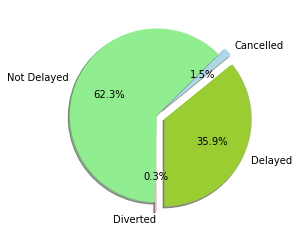

In [24]:
import matplotlib.pyplot as plt
labels="Delayed","Cancelled","Not Delayed","Diverted"
sizes=[delayed,cancelled,notdelayed,diverted]
colors=['yellowgreen','lightblue','lightgreen','pink']
explode=[0.1,0.1,0,0.1]
plt.pie(sizes,colors=colors,labels=labels,shadow=True,autopct='%1.1f%%',startangle=270,explode=explode)
#plt.axis('equal')
plt.show()

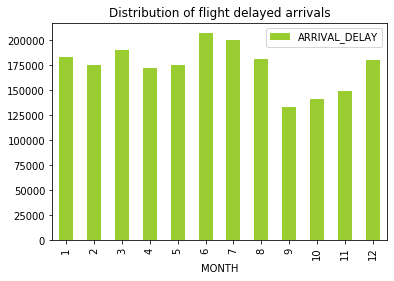

In [45]:
import seaborn as sns
from pandas import DataFrame
arrival_delays=df[df['ARRIVAL_DELAY']>0].loc[:,['MONTH','ARRIVAL_DELAY']]
Index= ['1','2','3','4','5','6','7','8','9','10','11','12']
Cols = [0,15,30,60]
heatmap_data=DataFrame(arrival_delays,index=Index,columns=Cols)
heatmap_data=arrival_delays.groupby(['MONTH'])['ARRIVAL_DELAY'].count()
heatmap_data=heatmap_data.to_frame()
heatmap_data.plot.bar(color="yellowgreen")
plt.title("Distribution of flight delayed arrivals")
plt.show()

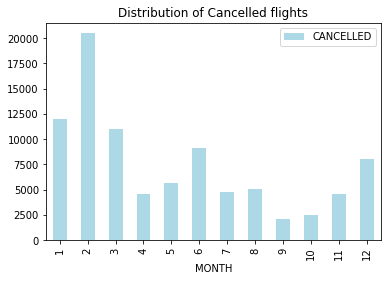

In [48]:
import seaborn as sns
from pandas import DataFrame
arrival_delays=df[df['CANCELLED']>0].loc[:,['MONTH','CANCELLED']]
Index= ['1','2','3','4','5','6','7','8','9','10','11','12']
Cols = [0,15,30,60]
heatmap_data=DataFrame(arrival_delays,index=Index,columns=Cols)
heatmap_data=arrival_delays.groupby(['MONTH'])['CANCELLED'].count()
heatmap_data=heatmap_data.to_frame()
heatmap_data.plot.bar(color="lightblue")
plt.title("Distribution of Cancelled flights")
plt.show()